In [11]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import utils
import warnings
warnings.filterwarnings('ignore')

DATA_PATH = "../data/final_pca_dataset.csv"
LABEL_PATH = "../data/sustainability_w_regions.csv"
LABEL_COLS = ["Country Name", "Year", "region", "sub-region"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
data = pd.read_csv(DATA_PATH)
labels = pd.read_csv(LABEL_PATH, usecols=LABEL_COLS)
labels = (
    labels.sort_values(by=["Country Name", "Year"])
    .drop_duplicates(subset="Country Name", keep="last")
    .reset_index(drop=True)
)

In [13]:
data.head(3)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26
0,-0.643805,2.191136,0.321808,-1.441855,0.171220,0.149858,-0.471543,-0.206151,-0.060449,0.342254,...,-0.186154,0.606148,-0.352419,0.535856,-0.562325,-0.357243,0.171390,0.092316,0.249222,-0.075066
1,-1.299059,-1.662512,2.966026,-1.477720,1.362689,-0.444011,0.486824,-0.045000,-0.117723,-1.032082,...,0.289182,-1.161640,0.132648,0.682834,-0.442228,-0.555521,0.166413,0.002465,-0.102565,-0.001728
2,4.710351,-1.789952,-1.155978,0.597963,2.055440,-1.476613,0.893746,-0.615902,-0.899434,0.717401,...,-0.320642,-0.087188,0.267852,0.364075,-0.853258,-0.222514,-0.519280,-0.291666,-0.978907,0.644450


In [14]:
labels.head(3)

,Country Name,Year,region,sub-region
0,Albania,2018,Europe,Southern Europe
1,Algeria,2018,Africa,Northern Africa
2,Angola,2018,Africa,Sub-Saharan Africa


Linear Regression MSE for region: 0.8618916073713346
R^2 0.2565359477124183

Linear Regression MSE for sub-region: 5.1796304335899706
R^2 -0.46131614050689174



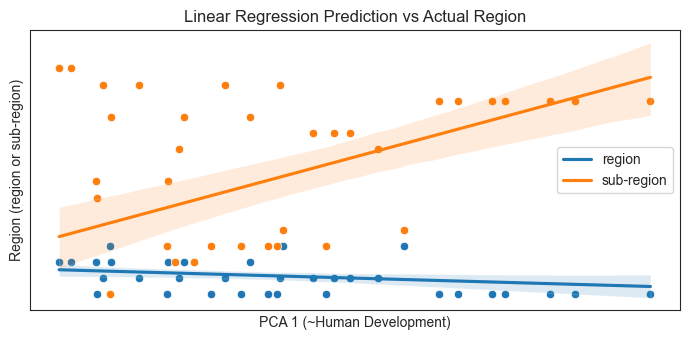

In [15]:
TARGETS = ["region", "sub-region"]

for target in TARGETS:
    X = data
    y = labels[target]
    y = pd.get_dummies(y, columns=target, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    predictions = linear_model.predict(X_test)

    predicted_region = predictions.argmax(axis=1)
    actual_region = np.argmax(y_test.to_numpy(), axis=1)

    # INSERT PLOT HERE
    sns.set_style("white")
    sns.scatterplot(x=X_test.iloc[:, 0], y=actual_region)
    sns.regplot(
        x=X_test.iloc[:, 0], y=predicted_region, scatter=False, label=f"{target}"
    )
    plt.gca().set_yticks([])
    plt.gca().set_xticks([])
    plt.xlabel("PCA 1 (~Human Development)")
    plt.ylabel(f"Region (region or sub-region)")
    plt.title("Linear Regression Prediction vs Actual Region")
    plt.legend()

    linear_mse = mean_squared_error(actual_region, predicted_region, squared=False)
    print(f"Linear Regression MSE for {target}: {linear_mse}")
    print(f"R^2 {r2_score(actual_region, predicted_region)}")
    print("")

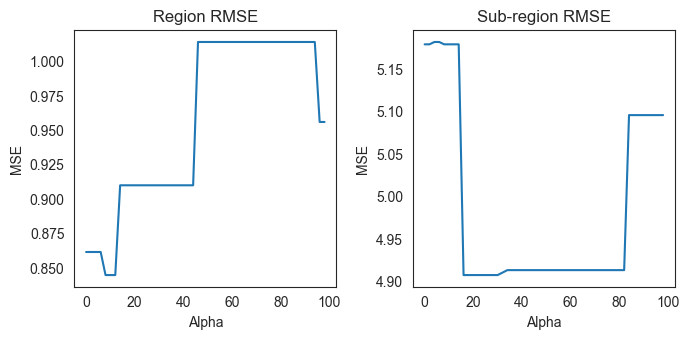

In [16]:
TARGETS = ["region", "sub-region"]
region_mse = []
sub_mse = []

for i, target in enumerate(TARGETS):
    for a in range(0, 100, 2):
        X = data
        y = labels[target]
        y = pd.get_dummies(y, columns=target, drop_first=True)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        ridge_model = Ridge(alpha=a)
        ridge_model.fit(X_train, y_train)
        predictions = ridge_model.predict(X_test)

        predicted_region = predictions.argmax(axis=1)
        actual_region = np.argmax(y_test.to_numpy(), axis=1)
        if target == "region":
            region_mse.append(
                mean_squared_error(actual_region, predicted_region, squared=False)
            )
        else:
            sub_mse.append(
                mean_squared_error(actual_region, predicted_region, squared=False)
            )

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

mse_df = pd.DataFrame(
    {
        "Alpha": [a for a in range(0, 100, 2)],
        "Region MSE": region_mse,
        "Sub-region MSE": sub_mse,
    }
)
sns.lineplot(ax=axes[0], data=mse_df, x="Alpha", y="Region MSE")
axes[0].set_title("Region RMSE")
axes[0].set_xlabel("Alpha")
axes[0].set_ylabel("MSE")

sns.lineplot(ax=axes[1], data=mse_df, x="Alpha", y="Sub-region MSE")
axes[1].set_title("Sub-region RMSE")
axes[1].set_xlabel("Alpha")
axes[1].set_ylabel("MSE")

plt.show()

Linear Regression MSE for region: 0.8451542547285166
R^2 0.28513071895424824

Linear Regression MSE for sub-region: 4.90771986626318
R^2 -0.31191640729212966



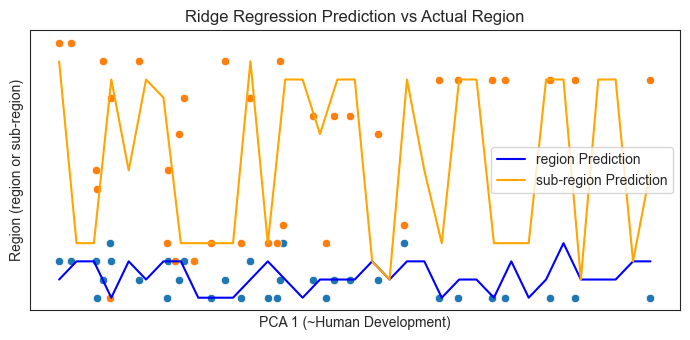

In [17]:
TARGETS = ["region", "sub-region"]
COLORS = ["blue", "orange"]
ALPHAS = [10, 20]

for i, target in enumerate(TARGETS):
    X = data
    y = labels[target]
    y = pd.get_dummies(y, columns=target, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    ridge_model = Ridge(alpha=ALPHAS[i])
    ridge_model.fit(X_train, y_train)
    predictions = ridge_model.predict(X_test)

    predicted_region = predictions.argmax(axis=1)
    actual_region = np.argmax(y_test.to_numpy(), axis=1)

    # INSERT PLOT HERE
    sns.set_style("white")
    sns.scatterplot(x=X_test.iloc[:, 0], y=actual_region)
    x_range = np.linspace(X_test.iloc[:, 0].min(), X_test.iloc[:, 0].max(), 35)
    plt.plot(x_range, predicted_region, color=COLORS[i], label=f"{target} Prediction")
    plt.gca().set_yticks([])
    plt.gca().set_xticks([])
    plt.xlabel("PCA 1 (~Human Development)")
    plt.ylabel(f"Region (region or sub-region)")
    plt.title("Ridge Regression Prediction vs Actual Region")
    plt.legend()

    mse = mean_squared_error(actual_region, predicted_region, squared=False)
    print(f"Linear Regression MSE for {target}: {mse}")
    print(f"R^2 {r2_score(actual_region, predicted_region)}")
    print("")